In [19]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [20]:
file= open("data1.txt","r",encoding="UTF-8")

In [21]:
lines = []
for i in file:
      lines.append(i)
data =""
for i in lines:
      data =' '.join(lines)

data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')
print(len(data))

54373


In [22]:
data = data.split()
data = ' '.join(data)
print(len(data))

53458


In [23]:
data[:100]

'The Project Gutenberg eBook of The Man With the Golden Eyes, by Alexander Blade This eBook is for th'

In [24]:
import nltk
from nltk.tokenize import word_tokenize

tokens = word_tokenize(data)
train_len = 3+1
text_sequences = []
for i in range(train_len,len(tokens)):
    seq = tokens[i-train_len:i]
    text_sequences.append(seq)
print(text_sequences)
print(len(text_sequences))

[['The', 'Project', 'Gutenberg', 'eBook'], ['Project', 'Gutenberg', 'eBook', 'of'], ['Gutenberg', 'eBook', 'of', 'The'], ['eBook', 'of', 'The', 'Man'], ['of', 'The', 'Man', 'With'], ['The', 'Man', 'With', 'the'], ['Man', 'With', 'the', 'Golden'], ['With', 'the', 'Golden', 'Eyes'], ['the', 'Golden', 'Eyes', ','], ['Golden', 'Eyes', ',', 'by'], ['Eyes', ',', 'by', 'Alexander'], [',', 'by', 'Alexander', 'Blade'], ['by', 'Alexander', 'Blade', 'This'], ['Alexander', 'Blade', 'This', 'eBook'], ['Blade', 'This', 'eBook', 'is'], ['This', 'eBook', 'is', 'for'], ['eBook', 'is', 'for', 'the'], ['is', 'for', 'the', 'use'], ['for', 'the', 'use', 'of'], ['the', 'use', 'of', 'anyone'], ['use', 'of', 'anyone', 'anywhere'], ['of', 'anyone', 'anywhere', 'in'], ['anyone', 'anywhere', 'in', 'the'], ['anywhere', 'in', 'the', 'United'], ['in', 'the', 'United', 'States'], ['the', 'United', 'States', 'and'], ['United', 'States', 'and', 'most'], ['States', 'and', 'most', 'other'], ['and', 'most', 'other', 'par

In [25]:
sequences = {}
count = 1
for i in range(len(tokens)):
    if tokens[i] not in sequences:
        sequences[tokens[i]] = count
        count += 1
print(sequences)

{'The': 1, 'Project': 2, 'Gutenberg': 3, 'eBook': 4, 'of': 5, 'Man': 6, 'With': 7, 'the': 8, 'Golden': 9, 'Eyes': 10, ',': 11, 'by': 12, 'Alexander': 13, 'Blade': 14, 'This': 15, 'is': 16, 'for': 17, 'use': 18, 'anyone': 19, 'anywhere': 20, 'in': 21, 'United': 22, 'States': 23, 'and': 24, 'most': 25, 'other': 26, 'parts': 27, 'world': 28, 'at': 29, 'no': 30, 'cost': 31, 'with': 32, 'almost': 33, 'restrictions': 34, 'whatsoever': 35, '.': 36, 'You': 37, 'may': 38, 'copy': 39, 'it': 40, 'give': 41, 'away': 42, 'or': 43, 're-use': 44, 'under': 45, 'terms': 46, 'License': 47, 'included': 48, 'this': 49, 'online': 50, 'www.gutenberg.org': 51, 'If': 52, 'you': 53, 'are': 54, 'not': 55, 'located': 56, 'will': 57, 'have': 58, 'to': 59, 'check': 60, 'laws': 61, 'country': 62, 'where': 63, 'before': 64, 'using': 65, 'Title': 66, ':': 67, 'Author': 68, 'Release': 69, 'Date': 70, 'November': 71, '23': 72, '2021': 73, '[': 74, '#': 75, '66802': 76, ']': 77, 'Language': 78, 'English': 79, 'Produced'

In [29]:
import pickle
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
#saving the tokenizer
#pickle.dump(tokenizer, open('token.pkl','wb'))
sequence_data = tokenizer.texts_to_sequences(text_sequences) 
print(sequence_data)

[[2, 20, 55, 113], [20, 55, 113, 7], [55, 113, 7, 2], [113, 7, 2, 28], [7, 2, 28, 16], [2, 28, 16, 2], [28, 16, 2, 79], [16, 2, 79, 51], [2, 79, 51, 3], [79, 51, 3, 43], [51, 3, 43, 426], [3, 43, 426, 427], [43, 426, 427, 23], [426, 427, 23, 113], [427, 23, 113, 25], [23, 113, 25, 27], [113, 25, 27, 2], [25, 27, 2, 123], [27, 2, 123, 7], [2, 123, 7, 169], [123, 7, 169, 428], [7, 169, 428, 11], [169, 428, 11, 2], [428, 11, 2, 101], [11, 2, 101, 80], [2, 101, 80, 8], [101, 80, 8, 225], [80, 8, 225, 66], [8, 225, 66, 574], [225, 66, 574, 7], [66, 574, 7, 2], [574, 7, 2, 226], [7, 2, 226, 49], [2, 226, 49, 45], [226, 49, 45, 331], [49, 45, 331, 8], [45, 331, 8, 16], [331, 8, 16, 277], [8, 16, 277, 45], [16, 277, 45, 575], [277, 45, 575, 576], [45, 575, 576, 1], [575, 576, 1, 10], [576, 1, 10, 68], [1, 10, 68, 124], [10, 68, 124, 24], [68, 124, 24, 3], [124, 24, 3, 227], [24, 3, 227, 24], [3, 227, 24, 170], [227, 24, 170, 21], [24, 170, 21, 577], [170, 21, 577, 24], [21, 577, 24, 171], [577

In [30]:
len(sequence_data)

11458

In [31]:
sequence_data[:10]

[[2, 20, 55, 113],
 [20, 55, 113, 7],
 [55, 113, 7, 2],
 [113, 7, 2, 28],
 [7, 2, 28, 16],
 [2, 28, 16, 2],
 [28, 16, 2, 79],
 [16, 2, 79, 51],
 [2, 79, 51, 3],
 [79, 51, 3, 43]]

In [32]:
total_words = len(tokenizer.word_index) + 1
print(total_words)

2017


In [33]:
input_sequences = []
for line in lines:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  8239


In [34]:
input_sequences[:15]

[[2, 20],
 [2, 20, 55],
 [2, 20, 55, 113],
 [2, 20, 55, 113, 7],
 [2, 20, 55, 113, 7, 2],
 [2, 20, 55, 113, 7, 2, 28],
 [2, 20, 55, 113, 7, 2, 28, 16],
 [2, 20, 55, 113, 7, 2, 28, 16, 2],
 [2, 20, 55, 113, 7, 2, 28, 16, 2, 79],
 [2, 20, 55, 113, 7, 2, 28, 16, 2, 79, 51],
 [2, 20, 55, 113, 7, 2, 28, 16, 2, 79, 51, 43],
 [2, 20, 55, 113, 7, 2, 28, 16, 2, 79, 51, 43, 426],
 [23, 113],
 [23, 113, 25],
 [23, 113, 25, 27]]

In [35]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2, 20, 55])

In [36]:
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [37]:
print(xs[5])
print(labels[5])
print(ys[5][14])

[  0   0   0   0   0   0   0   0   0   0   2  20  55 113   7   2]
28
0.0


# Training part


In [38]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history = model.fit(xs, ys, epochs=50, verbose=1,callbacks=[checkpoint])
#print model.summary()
print(model)

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
258/258 [==============================] - ETA: 0s - loss: 6.3297 - accuracy: 0.0717
Epoch 00001: loss improved from inf to 6.32966, saving model to next_words.h5
258/258 [==============================] - 8s 22ms/step - loss: 6.3297 - accuracy: 0.0717
Epoch 2/50
257/258 [============================>.] - ETA: 0s - loss: 5.3920 - accuracy: 0.1246
Epoch 00002: loss improved from 6.32966 to 5.39139, saving model to next_words.h5
258/258 [==============================] - 6s 22ms/step - loss: 5.3914 - accuracy: 0.1248
Epoch 3/50
258/258 [==============================] - ETA: 0s - loss: 4.5826 - accuracy: 0.1759
Epoch 00003: loss improved from 5.39139 to 4.58265, saving model to next_words.h5
258/258 [==============================] - 6s 23ms/step - loss: 4.5826 - accuracy: 0.1759
Epoch 4/50
256/258 [============================>.] - ETA: 0s - loss: 3.7022 - accuracy: 0.2419
Epoch 00004: loss improved from 4.58265 to 3.70383, saving model to next_words.h5
258/258 [=============

Epoch 33/50
256/258 [============================>.] - ETA: 0s - loss: 2.5094 - accuracy: 0.4468
Epoch 00033: loss did not improve from 0.27080
258/258 [==============================] - 6s 24ms/step - loss: 2.5122 - accuracy: 0.4464
Epoch 34/50
257/258 [============================>.] - ETA: 0s - loss: 1.5148 - accuracy: 0.6096
Epoch 00034: loss did not improve from 0.27080
258/258 [==============================] - 6s 24ms/step - loss: 1.5189 - accuracy: 0.6089
Epoch 35/50
258/258 [==============================] - ETA: 0s - loss: 0.9785 - accuracy: 0.7310
Epoch 00035: loss did not improve from 0.27080
258/258 [==============================] - 6s 23ms/step - loss: 0.9785 - accuracy: 0.7310
Epoch 36/50
256/258 [============================>.] - ETA: 0s - loss: 0.6704 - accuracy: 0.8093
Epoch 00036: loss did not improve from 0.27080
258/258 [==============================] - 6s 24ms/step - loss: 0.6703 - accuracy: 0.8096
Epoch 37/50
257/258 [============================>.] - ETA: 0s -

In [39]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

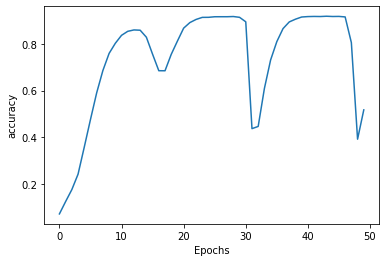

In [40]:
plot_graphs(history, 'accuracy')

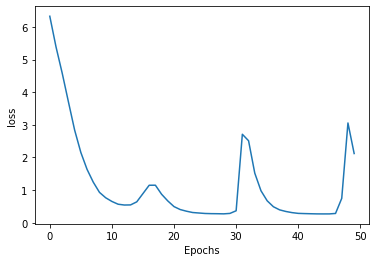

In [41]:
plot_graphs(history, 'loss')

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

# Predicting the output (Next two continous words)

In [43]:
from tensorflow.keras.models import load_model
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
#tokenizer = pickle.load(open('token.pkl','rb'))

In [48]:

while(True):
    seed_text = input("Enter your line: ")
  
    if seed_text == "0":
        print("Execution completed.....")
        break

    else:
        try:
            next_words = 2
            suggested_word = []
            #temp = seed_text
            for _ in range(next_words):
                
                token_list = tokenizer.texts_to_sequences([seed_text])[0]
                #print(token_list)
                token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
                predicted = np.argmax(model.predict(token_list), axis=-1)
                output_word = ""
                
                for word, index in tokenizer.word_index.items():
                    if index == predicted:
                        output_word = word
                        suggested_word.append(output_word)
                        break
                
                seed_text += " " + output_word
            print("Suggested next two word are : ",suggested_word)
            #n = int(input())
            
            print(seed_text)
        except Exception as e:
            print("Error occurred: ",e)
        continue

Enter your line: the project id
Suggested next two word are :  ['gutenberg', 'trademark']
the project id gutenberg trademark
Enter your line: the project id gutenberg trademark
Suggested next two word are :  ['contact', 'the']
the project id gutenberg trademark contact the
Enter your line: the project id gutenberg trademark contact the
Suggested next two word are :  ['foundation', 'as']
the project id gutenberg trademark contact the foundation as
Enter your line: This eBook is for the use of anyone
Suggested next two word are :  ['anywhere', 'in']
This eBook is for the use of anyone anywhere in
Enter your line: He lay in the gutter. In his
Suggested next two word are :  ['mouth', 'was']
He lay in the gutter. In his mouth was
Enter your line: 0
Execution completed.....


# Predicting the three suggested words

In [57]:
from keras.preprocessing.sequence import pad_sequences
input_text = input().strip().lower()
encoded_text = tokenizer.texts_to_sequences([input_text])[0]
pad_encoded = pad_sequences([encoded_text], maxlen=max_sequence_len-1, truncating='pre')
print(encoded_text, pad_encoded)
for i in (model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:
    pred_word = tokenizer.index_word[i]
    print("Next word suggestion:",pred_word)

the lower number of the project
[2, 907, 573, 7, 2, 20] [[  0   0   0   0   0   0   0   0   0   0   2 907 573   7   2  20]]
Next word suggestion: gutenberg
Next word suggestion: state
Next word suggestion: of
